# D213 Task 1

This is my task 1 assignment for d212

## A1:RESEARCH QUESTION


> 1.  Summarize one research question that is relevant to a real-world organizational situation captured in the selected data set and that you will answer using time series modeling techniques.

A research questions that I have that is relevant to a real-world organization is "Is it possible to create a forecasting model off of time-series data to have an estimate of what revenue will be in the future?". This is an important business question to ask as, having an understanding or estimate of what futures sales will be like allows the stakeholder to make better informed decisions in the present.

## A2:OBJECTIVES OR GOALS


> 2.  Define the objectives or goals of the data analysis. Ensure your objectives or goals are reasonable within the scope of the scenario and are represented in the available data.



The objective of this data analysis is to create an ARIMA model that will give us a forecast of future revenue. For this analysis I will use the following libraries:
- Pandas: Pandas is important as it add in dataframes which allows us to import csv's, modify their data, and input it into models
- Numpy: Numpy is used in this analysis in order to read data from a column in a dataframe. Numpy is used to work with data in an array format
- Scipy: Scipy is used in this analysis for normalizing the data and finding z-score.
- Matplotlib: Matplotlib is used to plot graphs
- Seaborn: Seaborn is used to visualize data similar to matplotlib

In [51]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import scipy.stats as stats


import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

import warnings
warnings.filterwarnings("ignore")

## B:SUMMARY OF ASSUMPTIONS


> B.  Summarize the assumptions of a time series model including stationarity and autocorrelated data.



The assumptions of a time series model including stationarity and autocorrelated data are:
- Stationarity: This implies that statistical properties like variance do not change over time. Allows us to get our d, p, and q values. When we make our data stationary, we remove the trend and make the mean and variance constant.
- Autocorrelated data: Autocorrelation is is the correlation of a time series with a lagged copy of itself. Any significant non-zero correlations implies that the series can be forecast from the past
- ARIMA models assume a linear relationship between the future observations and past observations. If the time series data contains a relationship that is non-linear, than the ARIMA model may not accurately forecast future values

## C1:LINE GRAPH VISUALIZATION


> 1.  Provide a line graph visualizing the realization of the time series.



To do this, we will use matplotlib to create a line plot of the dataframe which contains the revenue data. We can see the plot line has days on the x-axis and revnue on the y-axis, with the line moving in a linear fashion upwards. We can tell that this trend exists by adding a trend-line using an example from matplotlib from statology.org.

In [52]:
df = pd.read_csv('teleco_time_series .csv')

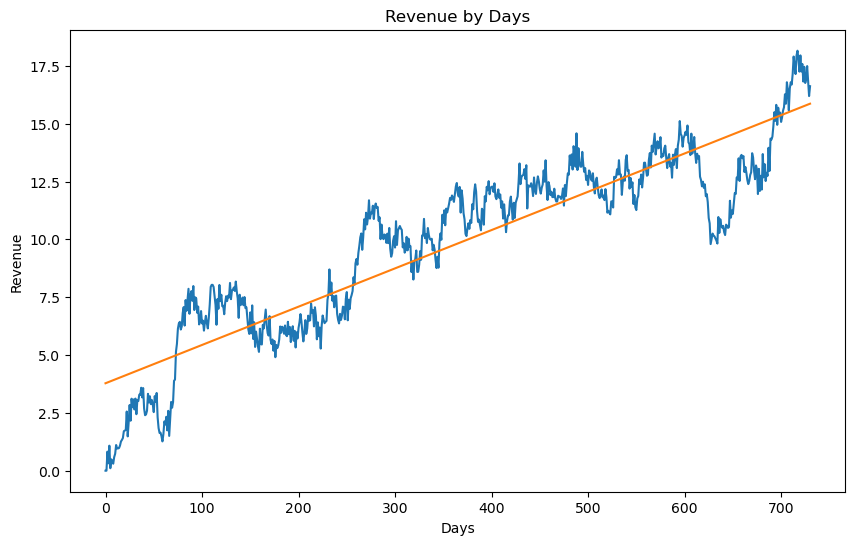

In [53]:
x=df.index
y=df['Revenue']
z=np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.figure(figsize=(10,6))
plt.plot(x,y)

#add trendline to plot
plt.plot(x, p(x))

plt.xlabel('Days')
plt.ylabel('Revenue')
plt.title('Revenue by Days')
plt.show()

## C2:TIME STEP FORMATTING


> 2.  Describe the time step formatting of the realization, including any gaps in measurement and the length of the sequence.



The metrics related to the time step formatting of the data are:
- Interval: The data is on a daily interval. Each observation is therefore incremented on a daily basis
- There are no apparent gaps in the data, as can be seen in the plot above
- The data contains 731 days of time series data, each with an associated revenue value


## C3:STATIONARITY


> 3.  Evaluate the stationarity of the time series.



The data included in the dataframe is not stationary. This can be seen because if one looks at the plot above, there is an upward trend among the data. The upward trend can be seen in the trend line that was plotted in the graph above. Stationary data does not have a trend, therefore this data is not stationary. An example of stationary data would be white noise, which does not create an apparent trend in a certain direction.

## C4:STEPS TO PREPARE THE DATA


> 4.  Explain the steps you used to prepare the data for analysis, including the training and test set split.



In order to verify the data is not stationary, we can run a Dickey-Fuller test. As we can see from the result, the p-value is not significant, therefore our data is not stationary.

In [54]:
def ad_test(df):
    dftest = adfuller(df, autolag = 'AIC')
    print('1. ADF: ', dftest[0])
    print('2. P-value: ', dftest[1])
    print('3. Number of lags: ', dftest[2])
    print('4. Number of observations used for ADF regression and critical values calcuation: ', dftest[3])
    print('5. Critical Values: ')
    for key, val in dftest[4].items():
        print('\t',key,': ',val)

In [55]:
ad_test(df['Revenue'])

1. ADF:  -1.9246121573101835
2. P-value:  0.3205728150793964
3. Number of lags:  1
4. Number of observations used for ADF regression and critical values calcuation:  729
5. Critical Values: 
	 1% :  -3.4393520240470554
	 5% :  -2.8655128165959236
	 10% :  -2.5688855736949163


Since our data is not stationary, we need to convert it to a stationary dataset for it to work with the ARIMA model. We can use .diff() to take the difference between each of the points in the dataset, and since our trend is linear, it should make our data stationary.

In [56]:
df2 = df

In [57]:
stationary_df = df2
stationary_df['Revenue'] = df2['Revenue'].diff()

In [58]:
stationary_df.head()

,Day,Revenue
0,1,NaN
1,2,0.000793
2,3,0.824749
3,4,-0.505210
4,5,0.762222


Then we need to drop the null row in the first row, and make the index same as the day:

In [59]:
stationary_df = stationary_df.dropna()
stationary_df['Day'] = stationary_df.index

In [60]:
stationary_df.head()

,Day,Revenue
1,1,0.000793
2,2,0.824749
3,3,-0.505210
4,4,0.762222
5,5,-0.974900


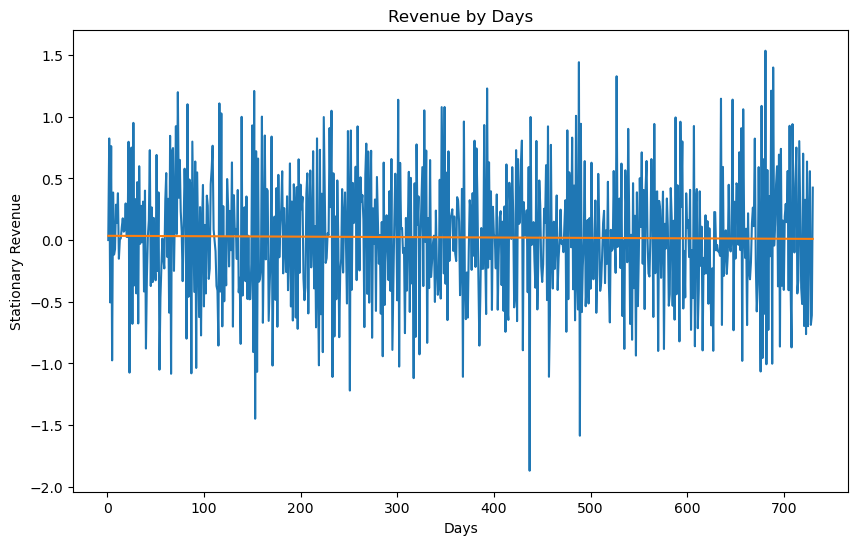

In [61]:
x=stationary_df.index
y=stationary_df['Revenue']
z=np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.figure(figsize=(10,6))
plt.plot(x,y)

#add trendline to plot
plt.plot(x, p(x))

plt.xlabel('Days')
plt.ylabel('Stationary Revenue')
plt.title('Revenue by Days')
plt.show()

Lets run the Dickey-Fuller test again to verify that the data is now stationary. Since the p-value is less than .05, it is significant so there is no trend and the data can be determined to be stationary.

In [62]:
ad_test(stationary_df['Revenue'])

1. ADF:  -44.87452719387599
2. P-value:  0.0
3. Number of lags:  0
4. Number of observations used for ADF regression and critical values calcuation:  729
5. Critical Values: 
	 1% :  -3.4393520240470554
	 5% :  -2.8655128165959236
	 10% :  -2.5688855736949163


Last, we just need to split our dataframe into a training and test set. We can use the function tran_test_split to do this:

In [63]:
df = pd.read_csv('teleco_time_series .csv')

In [64]:
train, test = train_test_split(df, test_size=.2, shuffle = False)

In [65]:
train

,Day,Revenue
0,1,0.000000
1,2,0.000793
2,3,0.825542
3,4,0.320332
4,5,1.082554
...,...,...
579,580,13.938920
580,581,14.052184
581,582,13.520478
582,583,13.082643


<AxesSubplot:xlabel='Day'>

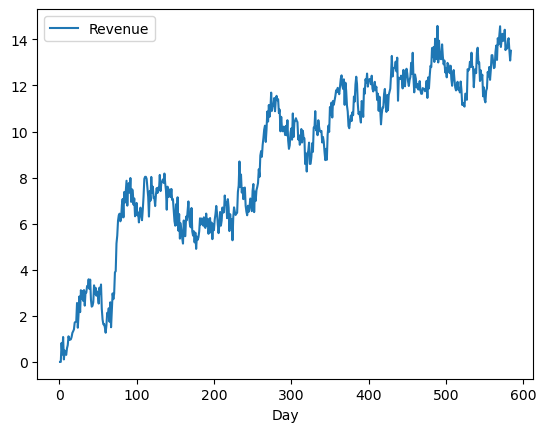

In [66]:
train.plot(x='Day',y='Revenue')

In [67]:
test

,Day,Revenue
584,585,13.684826
585,586,13.152903
586,587,13.310290
587,588,12.665601
588,589,13.660658
...,...,...
726,727,16.931559
727,728,17.490666
728,729,16.803638
729,730,16.194813


<AxesSubplot:xlabel='Day'>

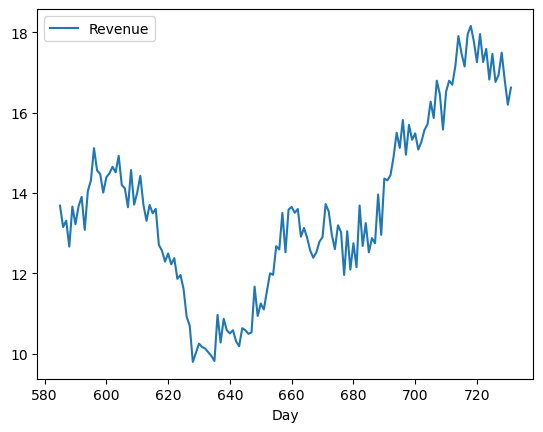

In [68]:
test.plot(x='Day',y='Revenue')

## C5:PREPARED DATA SET


> 5.  Provide a copy of the cleaned data set.



In [69]:
train.to_csv('task1_prepared_train.csv')
test.to_csv('task1_prepared_test.csv')

## D1:REPORT FINDINGS AND VISUALIZATIONS


> 1.  Report the annotated findings with visualizations of your data analysis, including the following elements:
> - the presence or lack of a seasonal component
>- trends
>- the autocorrelation function
>- the spectral density
>- the decomposed time series
>- confirmation of the lack of trends in the residuals of the decomposed series

### Seasonal Component

To visualize the seasonal component of our time series data, we can use the function seasonal_decompose. This function splits a time series into seasonal, trend, and residual components. We also need to specify a period, which is set to 7 so that we are looking at it on a weekly basis. We only need the first part, so lets start with running our data through the function:

In [70]:
decomposed_df = seasonal_decompose(stationary_df['Revenue'],period=7)

Text(0.5, 0, 'Days')

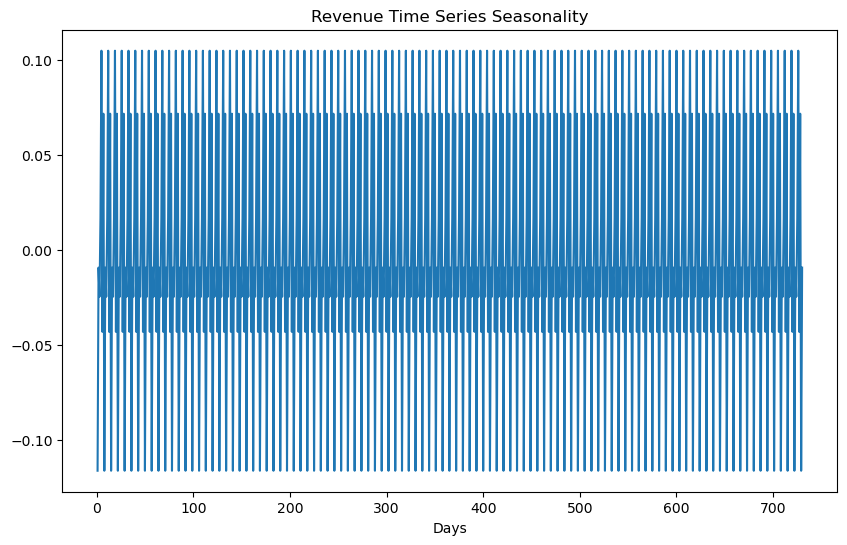

In [71]:
plt.figure(figsize=(10,6))
plt.plot(decomposed_df.seasonal)
plt.title('Revenue Time Series Seasonality')
plt.xlabel('Days')

Looking over the graph, the pattern seems repetitive. This would imply that there is seasonality over the weekly period in our time series data.

### Trends

We can used our decomposed dataframe again here to find the trend. We can see from the plot that there is no clear trend.

Text(0.5, 0, 'Days')

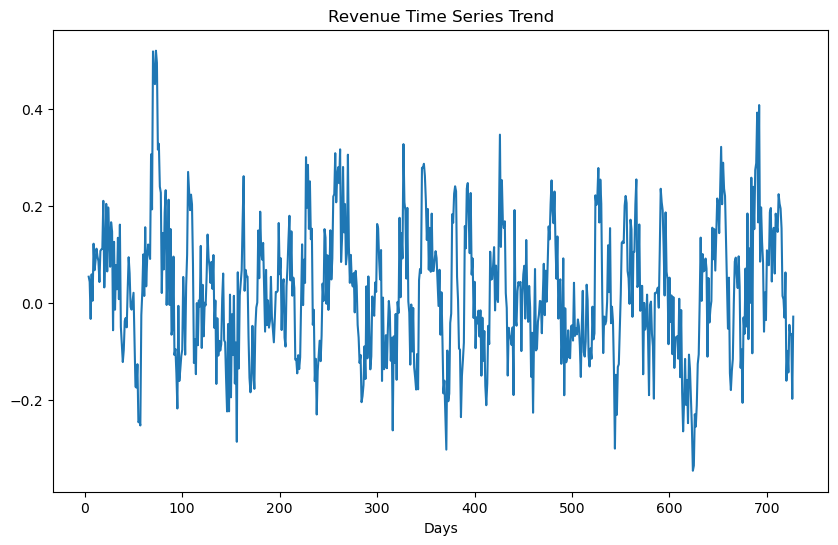

In [72]:
plt.figure(figsize=(10,6))
plt.plot(decomposed_df.trend)
plt.title('Revenue Time Series Trend')
plt.xlabel('Days')

### Autocorrelation Function

The autocorrelation function is a tool used to measure the correlation of a time series with its own past values. This is important for us to explore because it allows us to identify patterns and dependencies in the data over a period of time. The x-axis will contain lags, which indicate how many time periods back we are looking at for the correlation. The y-axis will show the autocorrelation values from 0 to 1. 

<Figure size 1000x600 with 0 Axes>

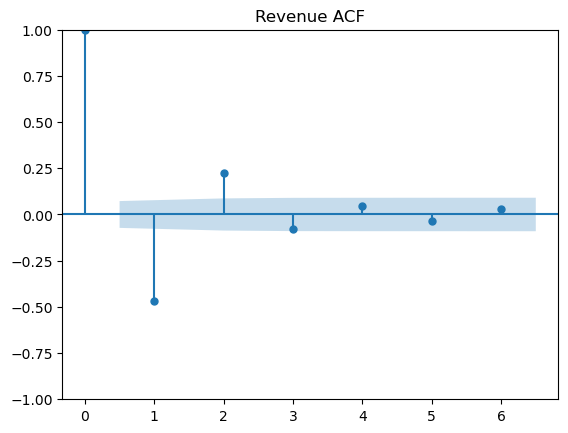

In [73]:
plt.figure(figsize=(10,6))
plot_acf(stationary_df['Revenue'], lags=6)
plt.title('Revenue ACF')
plt.show()

Setting the period to 6 allows us to look at correlation over a weekly basis, as it will include all 7 days of the week starting with 0. The bar for 0 is significantly positive, therefore it indicates a strong correlation between consecutive time points. However, the bar for 1 is significantly negative, therefore it might indicate an inverse relationship at this lag. The last point that falls out of the blue confidence interval area is bar 2, which is correlated positively, which means there is a strong correlation between it and consecutive time points.

### Spectral Density

Spectral density allows us to detrend data. It provides the ability observe seasonality. We can see that there is seasonality in the data as the line is not flat. If there was no seasonality, we would not have the peaks and troughs that are appparent in the plot below. 

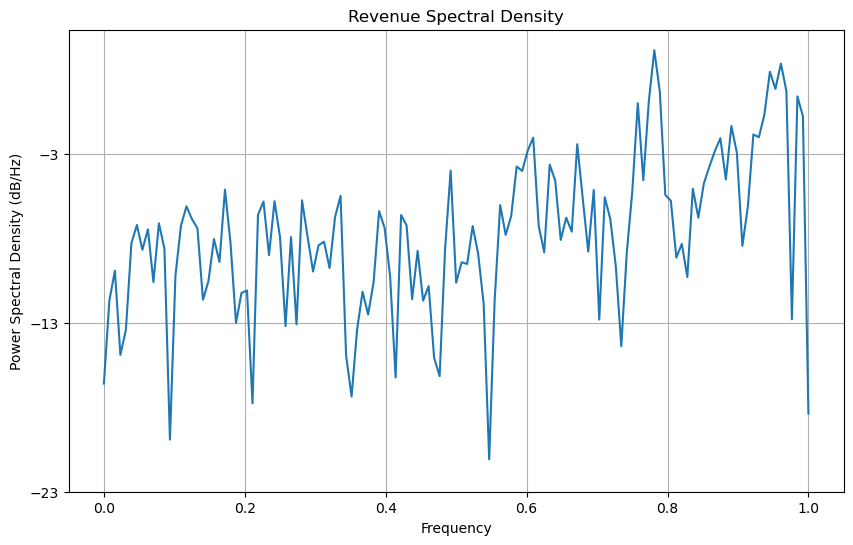

In [74]:
plt.figure(figsize=(10,6))
plt.psd(stationary_df['Revenue'])
plt.title('Revenue Spectral Density')
plt.show()

### Decomposed Times Series

This includes graphs for all of the time series data decomposed.

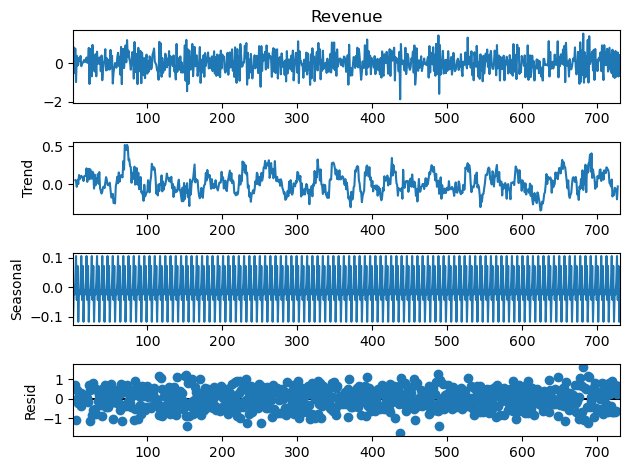

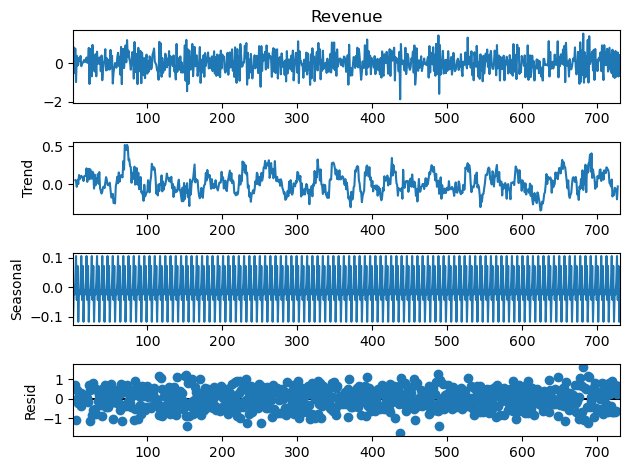

In [75]:
decomposed_df.plot()

### Confirmation of Lack of Trends In The Residuals of The Decmposed Series

There is no apparent trend in the residuals

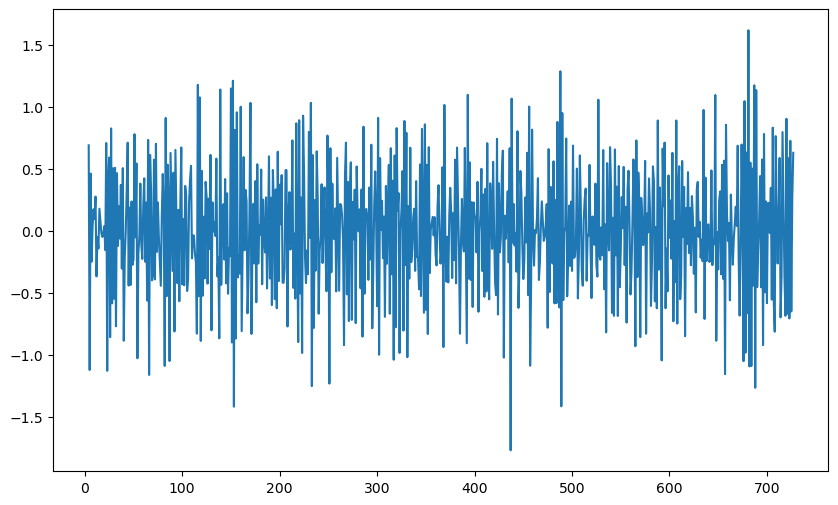

In [76]:
plt.figure(figsize=(10,6))
plt.plot(decomposed_df.resid)

## D2:ARIMA MODEL


> 2.  Identify an autoregressive integrated moving average (ARIMA) model that accounts for the observed trend and seasonality of the time series data.



Auto_arima tells us our p,d,q. In this case it tells us it is (1,0,0). The second set tells us the seasonality which is (0,0,0). The last set indicates there is no differencing required for the seasonality.

In [77]:
stepwise_fit = auto_arima(df['Revenue'].dropna(), trace=True, supress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=987.305, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1162.819, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=983.122, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1019.369, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1162.139, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=985.104, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=985.106, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=986.045, Time=0.31 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=984.710, Time=0.03 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 1.085 seconds


In [78]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  731
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -488.561
Date:                Sun, 16 Feb 2025   AIC                            983.122
Time:                        08:59:29   BIC                            996.901
Sample:                             0   HQIC                           988.438
                                - 731                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0332      0.018      1.895      0.058      -0.001       0.068
ar.L1         -0.4692      0.033    -14.296      0.000      -0.534      -0.405
sigma2         0.2232      0.013     17.801      0.000       0.199       0.248
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.05
Prob(Q):                              0.96   Prob(JB):                         0.36
Heteroskedasticity (H):               1.02   Skew:                            -0.02
Prob(H) (two-sided):                  0.85   Kurtosis:                         2.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## D3 & D4:FORECASTING USING ARIMA MODEL / OUTPUT AND CALCULATIONS


> 3.  Perform a forecast using the derived ARIMA model identified in part D2.
> 4.  Provide the output and calculations of the analysis you performed.



We can use out test and train from earlier, and run it through our derived ARIMA model. INCLUDE CONFIDENCE INTERVAL

In [79]:
print(df.shape)

(731, 2)


In [80]:
print(train.shape,test.shape)

(584, 2) (147, 2)


In [81]:
model = ARIMA(train['Revenue'],order=(1,1,0))
model = model.fit()

In [82]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                  584
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -385.018
Date:                Sun, 16 Feb 2025   AIC                            774.035
Time:                        08:59:29   BIC                            782.772
Sample:                             0   HQIC                           777.441
                                - 584                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4578      0.036    -12.618      0.000      -0.529      -0.387
sigma2         0.2193      0.014     15.954      0.000       0.192       0.246
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.81
Prob(Q):                              0.91   Prob(JB):                         0.40
Heteroskedasticity (H):               0.97   Skew:                            -0.07
Prob(H) (two-sided):                  0.81   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Now we make the predictions:

In [83]:
start = len(train)
end = len(train) + len(test)-1
pred = model.get_prediction(start=start, end=end, type='levels')
pred.index = df.index[start:end+1]

In [84]:
print(pred)

This compares the test revenue to the predicted mean

<AxesSubplot:>

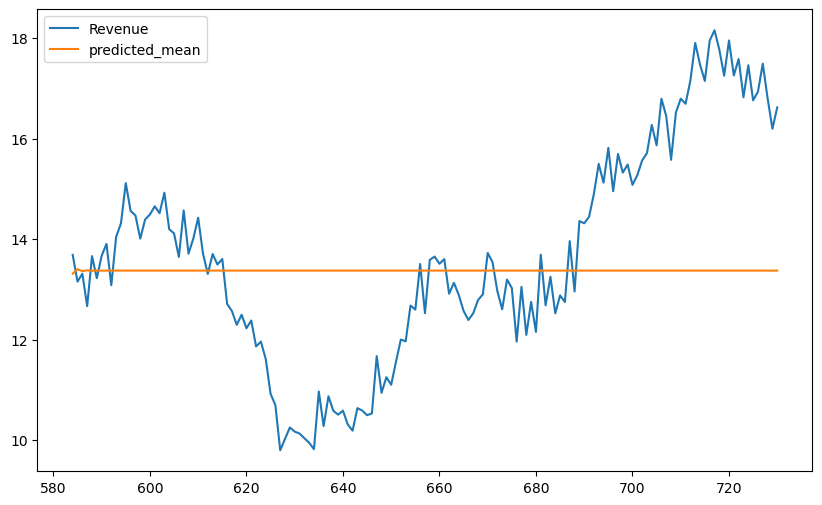

In [95]:
plt.figure(figsize=(10,6))
test['Revenue'].plot(legend=True)
pred.predicted_mean.plot(legend=True)


In [86]:
test['Revenue'].mean()

13.6450835735034

In [87]:
rmse = sqrt(mean_squared_error(pred.predicted_mean,test['Revenue']))

In [88]:
rmse

2.176506685113189

## E1:RESULTS


1. Discuss the results of your data analysis, including the following points:
> - the selection of an ARIMA model
> - the prediction interval of the forecast
> - a justification of the forecast length
> - the model evaluation procedure and error metric



### Selection of ARIMA

For the selection of the ARIMA model, I used auto arima to determine which ARIMA model to use. Since I inputted the original dataframe and not the decomposed one, it gave us d=1 and a p,d,q of (1,1,0). This is the ARIMA model that I used in the analysis

### Prediction Interval of the Forecast

The prediction interval of the forecast is taken from using the get_predictions version of statsmodel ARIMA function. This allows us to see where the revenue will potentially fall into. As we can see from the plot, the revenue falls within the predicted confidence intervals if we center it at the predicted mean.

In [89]:
confidence_intervals = pred.conf_int()

In [90]:
confidence_intervals

,lower Revenue,upper Revenue
584,12.393824,14.229347
585,12.356091,14.444064
586,12.108188,14.610945
587,11.989503,14.766721
588,11.839696,14.899548
...,...,...
726,5.820428,20.924148
727,5.794232,20.950344
728,5.768127,20.976449
729,5.742111,21.002465


In [91]:
confidence_intervals.columns = ['lower Revenue', 'upper Revenue']

<AxesSubplot:>

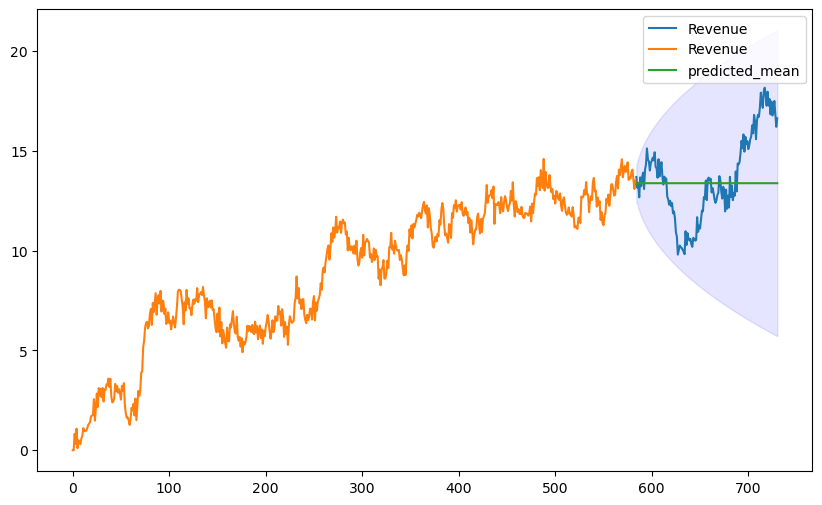

In [96]:
plt.figure(figsize=(10,6))
plt.fill_between(
    confidence_intervals.index,
    confidence_intervals['lower Revenue'],
    confidence_intervals['upper Revenue'],
    color='b',
    alpha=.1
)
test['Revenue'].plot(legend=True)
train['Revenue'].plot(legend=True)
pred.predicted_mean.plot(legend=True)


### Justification of the Forecast Length

For the forecasting length, I created a forecast the length of the test dataset so the confidence intervals and predicted mean could be compared up against it.

### Model Evaluation Prodcedure and Error Metric

The RMSE of this model was calculated at 2.17. This is calculated by taking the difference from the predicted mean and the test value, and then taking the difference and squaring it to remove the positive or negative sign from the difference. Then the square root is taken for this value and it represents the difference between the predicted mean point and the actual test value. When you average out the RMSE for all the points, you get the total RMSE. Therefore, the RMSE represents the margin of error at any point on the predicted mean.

In [98]:
rmse

2.176506685113189

## E2:ANNOTATED VISUALIZATION


> 2.  Provide an annotated visualization of the forecast of the final model compared to the test set.



<AxesSubplot:>

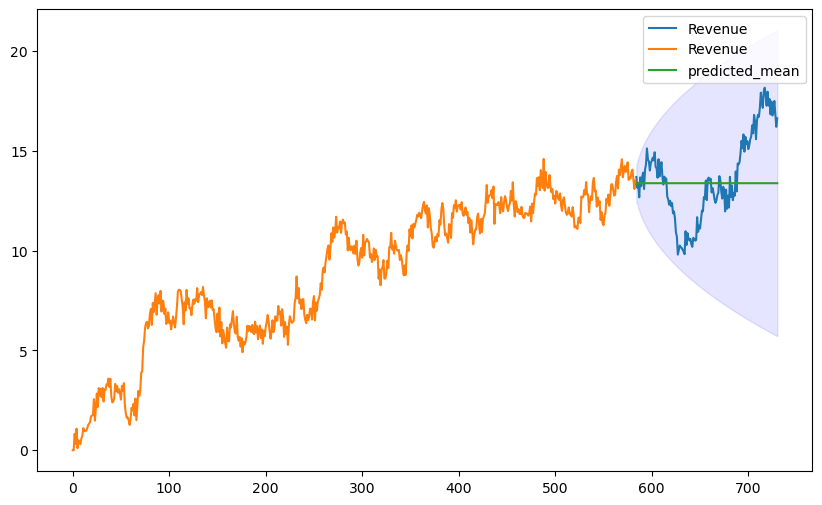

In [99]:
plt.figure(figsize=(10,6))
plt.fill_between(
    confidence_intervals.index,
    confidence_intervals['lower Revenue'],
    confidence_intervals['upper Revenue'],
    color='b',
    alpha=.1
)
test['Revenue'].plot(legend=True)
train['Revenue'].plot(legend=True)
pred.predicted_mean.plot(legend=True)


## E3:RECOMMENDATION


> 3.  Recommend a course of action based on your results.



## G:SOURCES FOR THIRD-PARTY CODE


https://www.statology.org/matplotlib-trendline/


## H:SOURCES

https://medium.com/@data-overload/understanding-arima-models-a-comprehensive-guide-to-time-series-forecasting-dfc7207f2406

https://westerngovernorsuniversity-my.sharepoint.com/:w:/g/personal/sherin_aly_wgu_edu/EfvL6YrRopZKsF8G3avbB8wBUV-Woey1FoIsMSF4mlEDYw?e=dvKFL1

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=70b99496-6deb-48a2-afd0-aee200c6c405